In [1]:
import numpy as np
from yahoofinancials import YahooFinancials
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm 
import matplotlib.pyplot as plt


In [16]:
a = {'IBM': 120.51829528808594, 'CSCO': 54.72999954223633,'QCOM': 167.97999572753906,'AMAT': 133.17987060546875,'LRCX': 562.8800048828125,'KLAC': 356.9257507324219,'TEL': 140.96771240234375,'MU': 88.83000183105469,'AAPL': 162.53292846679688,'AMZN': 3027.159912109375,'PFE': 45.959999084472656,'ANTM': 441.80999755859375,'GILD': 60.61000061035156,'CI': 224.42999267578125,'WFC': 52.47439193725586,'BAC': 43.599998474121094,'MS': 91.80999755859375,'HII': 190.78103637695312,'PNR': 57.5099983215332,'OXY': 38.91999816894531,'AMCR': 11.364039421081543}
b = list(a.keys()).remove('AMZN')

In [2]:
def price_pre(s):
    price = {}
    for ticker in s:
        data = pd.DataFrame()
        data[ticker] = wb.DataReader(ticker,data_source = 'yahoo',start = '2012-05-31', end = '2021-1-31')['Adj Close']
        log_returns = np.log(1+data.pct_change())
        u = log_returns.mean()
        var = log_returns.var()
        drift = u - (0.5*var)
        stdev = log_returns.std()
        np.array(drift)
        t_intervals = 183
        daily_return = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,10)))
        s0 = data.iloc[-1]
        price_list = np.zeros_like(daily_return)
        price_list[0] = s0
        for t in range(1,t_intervals):
            price_list[t] = price_list[t-1]*daily_return[t]
        plt.figure(figsize = (10,6))
        plt.plot(price_list)
    return price

In [22]:
def price_predict(s):
    price = {}
    for ticker in s:
        data = pd.DataFrame()
        data[ticker] = wb.DataReader(ticker,data_source = 'yahoo',start = '2012-05-31', end = '2021-1-31')['Adj Close']
        log_returns = np.log(1+data.pct_change())
        u = log_returns.mean()
        var = log_returns.var()
        drift = u - (0.5*var)
        stdev = log_returns.std()
        np.array(drift)
        t_intervals = 183
        daily_return = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,10)))
        s0 = data.iloc[-1]
        price_list = np.zeros_like(daily_return)
        price_list[0] = s0
        for t in range(1,t_intervals):
            price_list[t] = price_list[t-1]*daily_return[t]
        price[ticker] =  price_list[-1].mean()
        plt.figure(figsize = (10,6))
        plt.plot(price_list)
    return price

{'CSCO': 50.08283931363889,
 'QCOM': 216.72059456148827,
 'AMAT': 131.6123815227002,
 'LRCX': 583.1833551398306,
 'KLAC': 351.62857436787556,
 'LMT': 375.74480459967776,
 'TSLA': 1338.11974624639,
 'AAPL': 147.29818644615952,
 'CI': 234.35209132929032,
 'REGN': 477.4797274422209,
 'PFE': 38.82081990082562,
 'BX': 72.87186653740588,
 'HII': 156.9243232092935,
 'NVDA': 214.35404711165597,
 'SQ': 358.2594978382326,
 'AMCR': 10.155054122138523,
 'MS': 62.617464794842554}

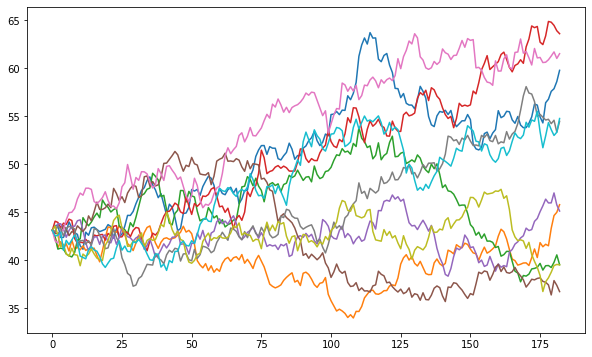

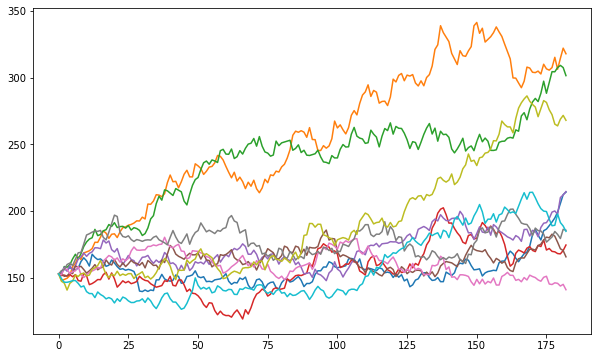

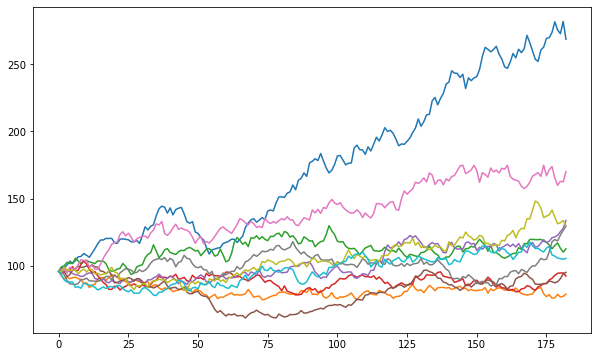

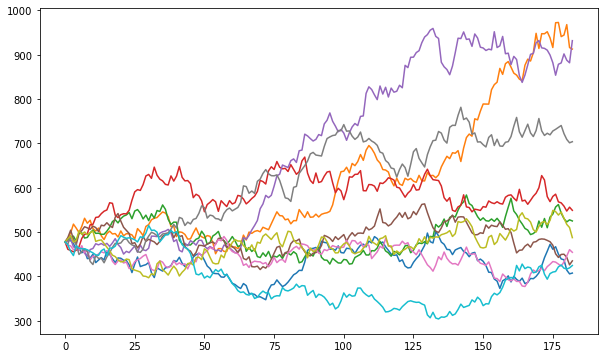

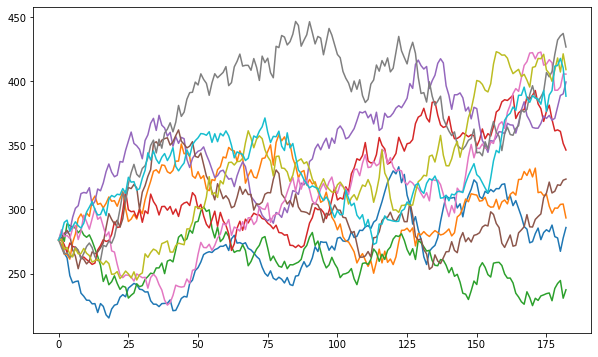

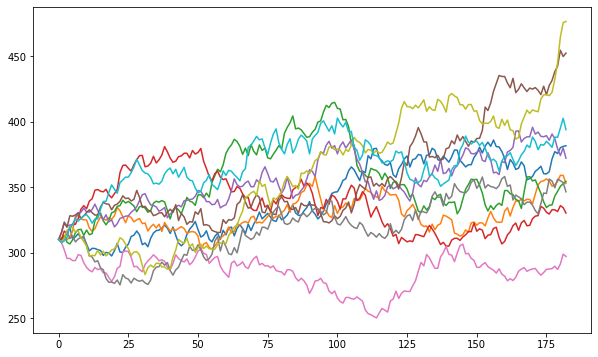

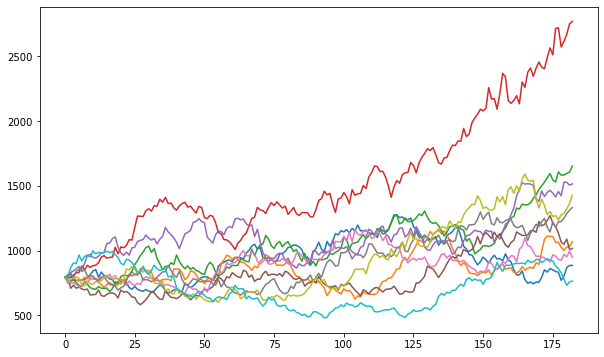

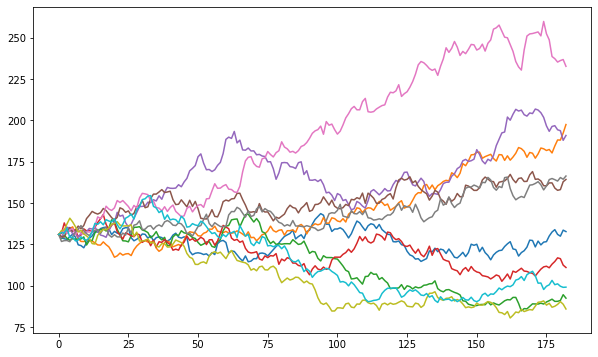

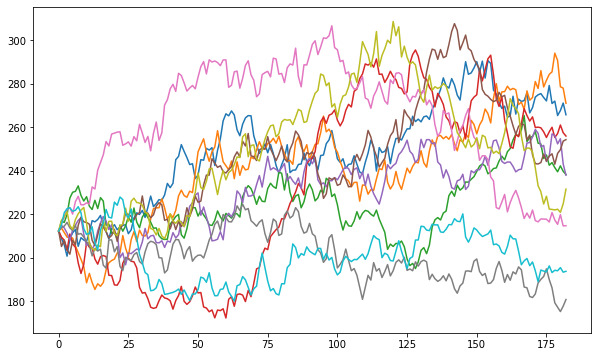

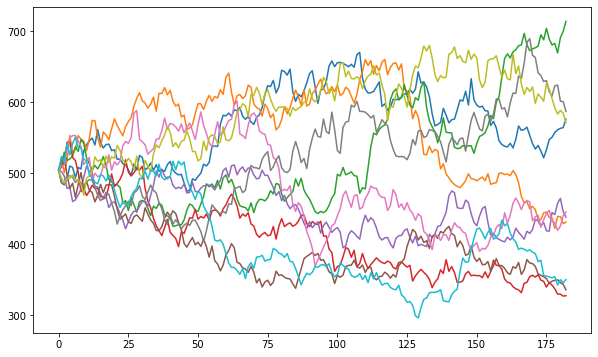

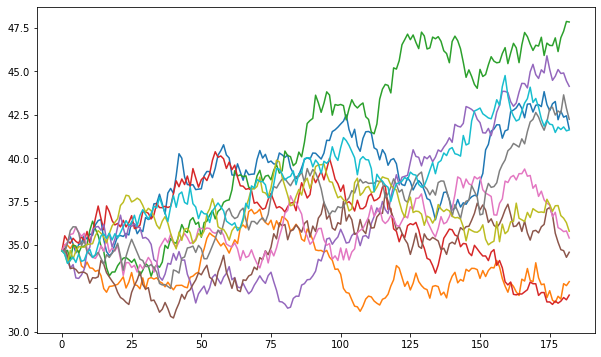

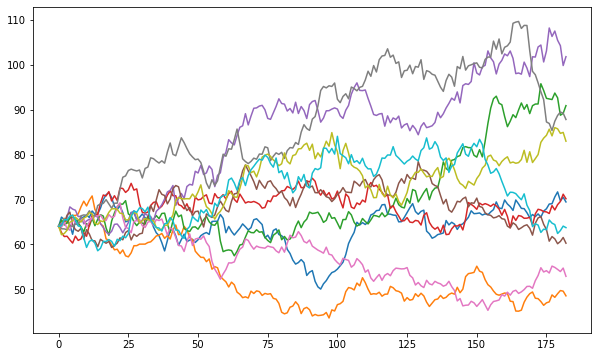

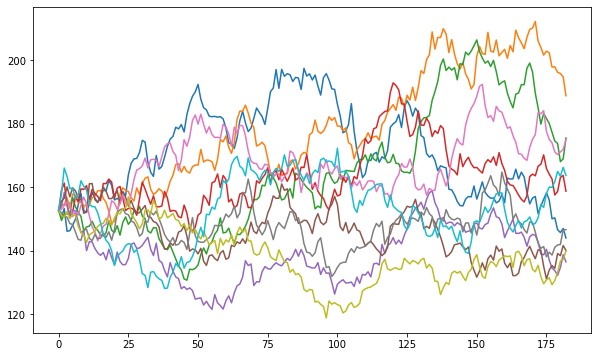

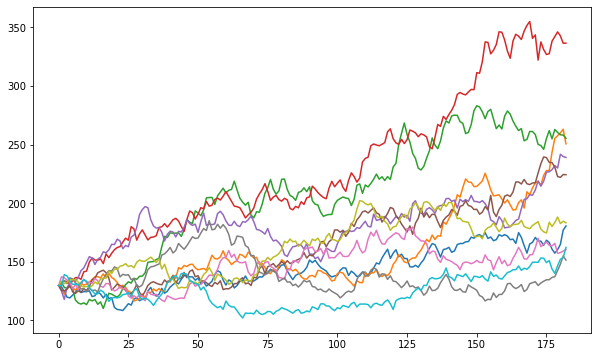

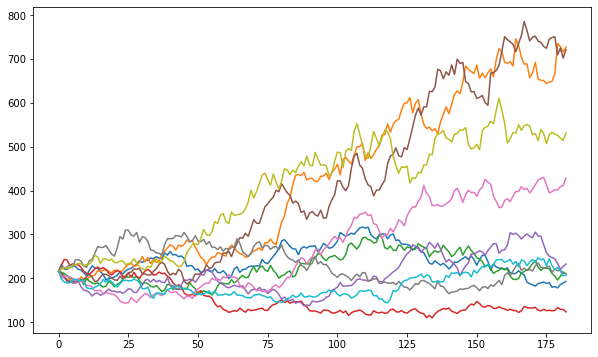

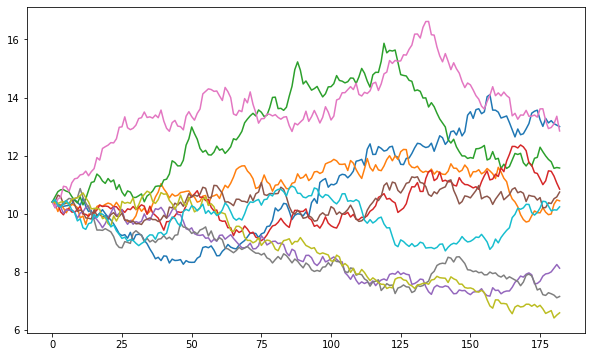

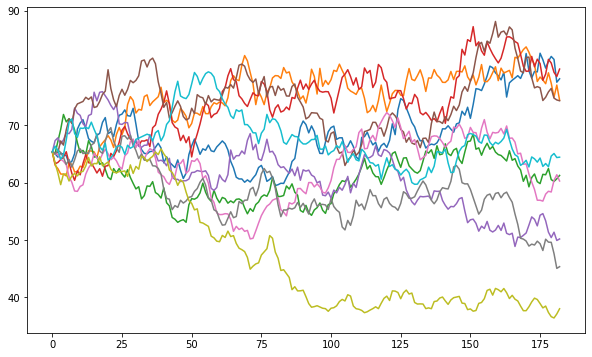

In [24]:
price_predict(['CSCO','QCOM','AMAT','LRCX','KLAC','LMT','TSLA','AAPL','CI','REGN','PFE','BX','HII','NVDA','SQ','AMCR','MS'])

In [4]:
returns = {}
uu = []
def return_predict(s):
    for ticker in s:
        data = pd.DataFrame()
        data[ticker] = wb.DataReader(ticker,data_source = 'yahoo',start = '2012-05-31', end = '2021-1-31')['Adj Close']
        log_returns = np.log(1+data.pct_change())
        u = log_returns.mean()
        var = log_returns.var()
        drift = u - (0.5*var)
        stdev = log_returns.std()
        np.array(drift)
        t_intervals = 183
        daily_return = np.exp((drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,10))))
        a = daily_return[-1].tolist()
        a.remove(min(a))
        uu.append(np.mean(a))
    for i in range(len(s)):
        returns[s[i]] = uu[i]
    return returns

In [6]:
Return = {}
for i in list(returns.keys()):
    Return[i] = (returns[i]-1)*21

In [60]:
pb ={'LMT': 4.567508264314711,
 'TSLA': 68.25199919220184,
 'AAPL': 41.30060535774159,
 'CI': 1.733792891685187,
 'REGN': 3.4483882656544784,
 'PFE': 2.8615022798744425,
 'HII': 2.0071914462375906,
 'NVDA': 27.789598929934233,
 'AMCR': 2.972427618134894,
 'MS': 1.3467121544896519}

In [11]:
returns = {}
uu = []

s = b

for ticker in s:
    data = pd.DataFrame()
    data[ticker] = wb.DataReader(ticker,data_source = 'yahoo',start = '2012-05-31', end = '2021-1-31')['Adj Close']
    log_returns = np.log(1+data.pct_change())
    u = log_returns.mean()
    var = log_returns.var()
    drift = u - (0.5*var)
    stdev = log_returns.std()
    np.array(drift)
    t_intervals = 183
    daily_return = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,10)))*21
    a = daily_return[-1].tolist()
    a.remove(min(a))
    uu.append(np.mean(a))
    

NameError: name 'b' is not defined

In [58]:
price = {}
totalEquity = {}
otherEquity = {}
shares = {}
pb = {}
def pb_pre(s):
    for ticker in s:
        data = pd.DataFrame()
        data[ticker] = wb.DataReader(ticker,data_source = 'yahoo',start = '2012-05-31', end = '2021-1-31')['Adj Close']
        log_returns = np.log(1+data.pct_change())
        u = log_returns.mean()
        var = log_returns.var()
        drift = u - (0.5*var)
        stdev = log_returns.std()
        np.array(drift)
        t_intervals = 183
        daily_return = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,10)))
        s0 = data.iloc[-1]
        price_list = np.zeros_like(daily_return)
        price_list[0] = s0
        for t in range(1,t_intervals):
            price_list[t] = price_list[t-1]*daily_return[t]
        price[ticker] =  price_list[-1].mean()
        
    for ticker in s:
        try:
            yahoo_financials = YahooFinancials(ticker)
            a = yahoo_financials.get_financial_stmts('annual', 'balance')["balanceSheetHistory"][ticker][0]
            b = list(a.keys())[0]
            c = a[b]["totalStockholderEquity"]
            totalEquity[ticker] = c
        except:
            totalEquity[ticker] = 0
            pass
        try:
            d = a[b]["otherStockholderEquity"]
            otherEquity[ticker] = d
        except:
            otherEquity[ticker] = 0
            pass
    for ticker in s:
        yahoo_financials = YahooFinancials(ticker)
        shares[ticker] = yahoo_financials.get_num_shares_outstanding(price_type='current')
    for ticker in s:
        try:
            pb[ticker] = price[ticker]/((totalEquity[ticker]-otherEquity[ticker])/shares[ticker])
            
        except:
            pb[ticker] = None
            pass
    '''
    plt.figure(figsize = (10,6))
    plt.plot(price_list)
    '''
    return pb
    

In [27]:
pb_recent = {}
pb_recent['CSCO'] = 5.71
pb_recent['QCOM'] = 13.59
pb_recent['AMAT'] = 8.91
pb_recent['LRCX'] = 10.25
pb_recent['KLAC'] = 12.7
pb_recent['LMT'] = 11.29
pb_recent['TSLA'] = 35.11
pb_recent['AAPL'] = 38.59
pb_recent['CI'] = 1.74
pb_recent['REGN'] = 4.18
pb_recent['PFE'] = 4.04
pb_recent['BX'] = 8.55
pb_recent['HII'] = 3.18
pb_recent['NVDA'] = 23.27
pb_recent['SQ'] = 21.5
pb_recent['AMCR'] = 3.98
pb_recent['MS'] = 1.52

In [30]:
print(pb['CSCO'])
print(pb['QCOM'])
print(pb['AMAT'])
print(pb['LRCX'])
print(pb['KLAC'])
print(pb['LMT'])
print(pb['TSLA'])
print(pb['AAPL'])
print(pb['CI'])
print(pb['REGN'])
print(pb['PFE'])
print(pb['HII'])
print(pb['NVDA'])
print(pb['AMCR'])
print(pb['MS'])

5.16496583642496
19.697251471117657
8.193606313903171
15.369019663214594
16.258835597095793
4.567508264314711
68.25199919220184
41.30060535774159
1.733792891685187
3.4483882656544784
2.8615022798744425
2.0071914462375906
27.789598929934233
2.972427618134894
1.3467121544896519


In [ ]:
a = ['AMCR']# 'LMT','PFE','HII','AMCR'
for s in a:
    while pb[s]-pb_recent[s]<0.3:
        print(s)
        print(pb[s]-pb_recent[s])
        pb_pre([s])

AMCR
0.038875918906293716
AMCR
-0.07107185617274903
AMCR
-0.4749885670712688
AMCR
-0.6617716536103226
AMCR
-0.7447124410542334
AMCR
-0.3664249205819181
AMCR
-0.15039608122804715
AMCR
-0.8084121077607249
AMCR
-0.3545819153215377
AMCR
-0.6444267089090769
AMCR
-0.767504525016244
AMCR
-0.6523373709070328
AMCR
-0.4326202909090928
AMCR
-0.24067722426362392
AMCR
-0.3834147648549524
AMCR
-0.5003418976678908
AMCR
-0.6741066961663242
AMCR
-0.4033202029225791
AMCR
-0.3933697126723712
AMCR
-0.9079279469293668
AMCR
-0.508305519410071
AMCR
-0.3901113910585261
AMCR
-0.102955776315798
AMCR
-0.6803435414371339
AMCR
-0.09509281157626504
AMCR
-0.5539377286053928
AMCR
-0.717887274460784
AMCR
-0.7926698862537731
AMCR
-0.3559678747009132
AMCR
-0.5150767303924537
AMCR
-0.5449827238404286
AMCR
-0.6410298477199512
AMCR
-0.6596888515482133
AMCR
-0.23894108324953667
AMCR
-0.42715513872389765
AMCR
-0.3341117937679776
AMCR
-0.29374809703963667
AMCR
-0.6227996566524028
AMCR
-0.724297707814963
AMCR
-0.29309401267612